# CHO (Chaikin Oscillator)

FF-17	CHO (Chaikin Oscillator, which measures the change of the average range of prices in a certain period)

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

The Chaikin oscillator is named for its creator Marc Chaikin. The oscillator measures the accumulation-distribution line of moving average convergence-divergence (MACD). To calculate the Chaikin oscillator, subtract a 10-day exponential moving average (EMA) of the accumulation-distribution line from a 3-day EMA of the accumulation-distribution line.  
https://www.investopedia.com/terms/c/chaikinoscillator.asp

How to Calculate the Chaikin Oscillator?  
Calculate the accumulation-distribution line (ADL) in three steps. The fourth step yields the Chaikin Oscillator. 
1 Calculate the Money Flow Multiplier (N).  
2 Multiply the Money Flow Multiplier (N) by volume to calculate Money Flow Volume (N).  
3 List a running total of N to draw the accumulation-distribution line (ADL).  
4 Compute the difference between 10 period and 3 period exponential moving averages to calculate the Chaikin oscillator.  

```
Volume Indicators
MFI                  Money Flow Index
AD                   Chaikin A/D Line  
ADOSC                Chaikin A/D Oscillator  
```  

http://mrjbq7.github.io/ta-lib/func_groups/volume_indicators.html

```
ADOSC - Chaikin A/D Oscillator
real = ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
```

In [1]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

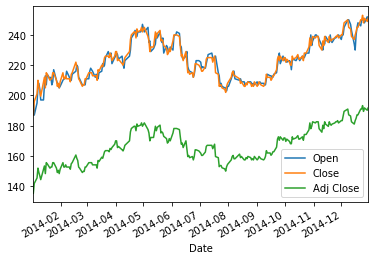

In [2]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

In [3]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

cho = ADOSC(inputs)

daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("CHO")] = cho.tolist()
daily.tail()



/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,CHO
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,-5.005559e+06,213623400.0,0.222698,6.340093e+06,...,8.317647,243.129319,2.016129,4.009376,11.660023,-7.650647,1.200000,1.192857,35.294118,3.918180e+06
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,-5.596826e+06,211849600.0,0.194908,4.167365e+06,...,9.008824,243.239696,-0.800000,-2.532403,8.821538,-11.353940,-1.976285,-1.996074,32.620321,3.315898e+06
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,-3.144126e+06,214302300.0,0.206448,4.623184e+06,...,9.029412,244.149666,2.448980,-7.243628,5.608505,-12.852132,1.209677,1.202419,34.224599,3.548469e+06
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,-4.513626e+06,212019800.0,0.188726,3.310587e+06,...,9.173529,244.718414,2.049180,-11.512135,2.184377,-13.696512,-0.796813,-0.800004,33.155080,2.885274e+06
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,-3.132066e+06,214322400.0,0.217800,3.495531e+06,...,8.258824,245.400251,5.020921,-15.084623,-1.269423,-13.815199,0.803213,0.800004,34.224599,2.791256e+06


# Plot of CHO on the original time-series

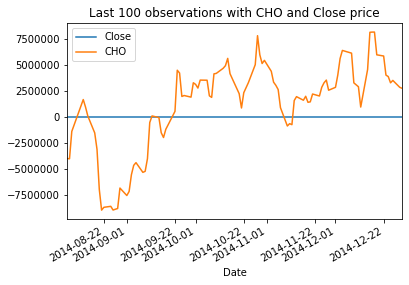

In [6]:
daily[['Close','CHO']][-100:].plot(title="Last 100 observations with CHO and Close price")

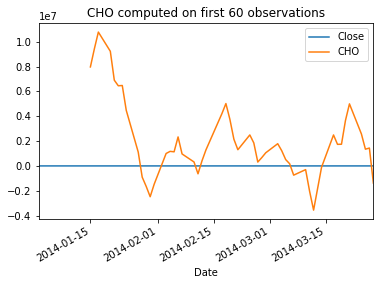

In [7]:
daily[['Close','CHO']][:60].plot(title="CHO computed on first 60 observations")

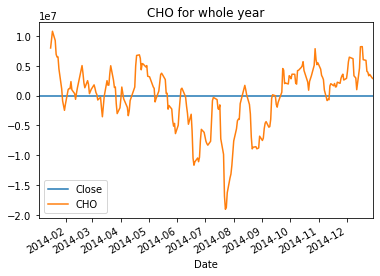

In [8]:
daily[['Close','CHO']].plot(title="CHO for whole year")

In [ ]:
daily.columns

In [ ]:
daily[['volume_vwap']].dropna().plot()

In [ ]:
daily[['volatility_atr']].dropna().plot()

In [ ]:
daily[['Close']].dropna().plot()